# Study of the smearing matrices in the FGD

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm
from dark_nus_utils import load_datasets
from const import alphaQED
from parameters_dict import mass_material

In [3]:
hierarchy = 'light'
D_or_M = 'majorana'
distance = 'log'
smoothing_pars = (0.1, 0.1)
selection = 'carbon'

In [4]:
save_folder = f'../fig/3_fgd_smearing_matrices/{hierarchy}_{D_or_M}'
!mkdir -p $save_folder

In [5]:
my_exp_analysis = load_datasets(hierarchy, D_or_M, timeit=True, dump=True, direct_load_objects=False, smearing=True)[f'{hierarchy}_{D_or_M}']

light majorana
loading df base
initialising df base


/n/home00/nfoppiani/.conda/envs/dark_nus/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


loading df 0.01, 0.0075
initialising df 0.01, 0.0075
loading df 0.1, 0.0075
initialising df 0.1, 0.0075
loading df 0.1, 0.03
initialising df 0.1, 0.03
loading df 0.4, 0.0075
initialising df 0.4, 0.0075
loading df 0.4, 0.03
initialising df 0.4, 0.03
loading df 0.4, 0.1
initialising df 0.4, 0.1
loading df 0.8, 0.0075
initialising df 0.8, 0.0075
loading df 0.8, 0.03
initialising df 0.8, 0.03
loading df 0.8, 0.1
initialising df 0.8, 0.1
loading df 0.8, 0.4
initialising df 0.8, 0.4
Wall time: 184.09395694732666 s, CPU time: 168.025716344


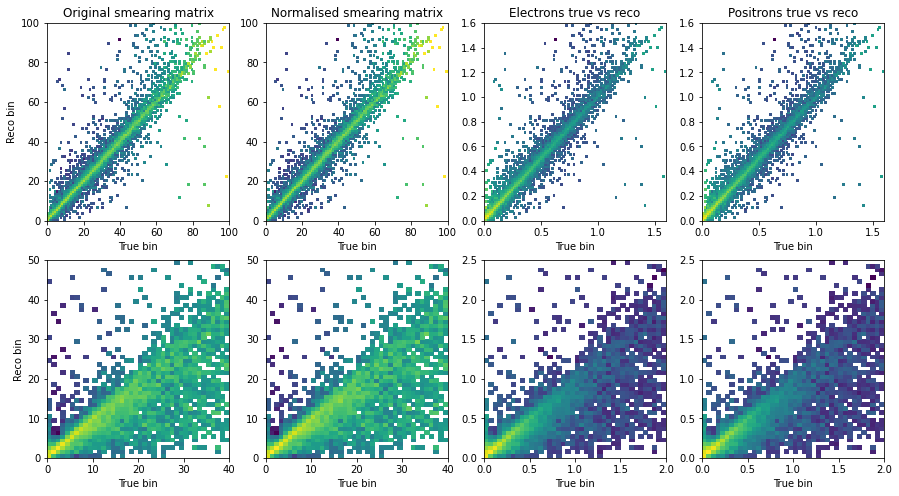

In [6]:
fig, axs = plt.subplots(2, 4, figsize=(15, 8))
axs[0][0].pcolor(my_exp_analysis.smearing_theta.T, norm=LogNorm())
axs[0][0].set_title('Original smearing matrix')

axs[0][1].pcolor((my_exp_analysis.smearing_theta.T/my_exp_analysis.smearing_theta.sum(axis=1)), norm=LogNorm())
axs[0][1].set_title('Normalised smearing matrix')

axs[0][2].hist2d(my_exp_analysis.df_base['em_beam_theta'], my_exp_analysis.df_base['em_beam_theta_reco'], 
              bins=(my_exp_analysis.theta_binning_true, my_exp_analysis.theta_binning_reco), norm=LogNorm());
axs[0][2].set_title('Electrons true vs reco')

axs[0][3].hist2d(my_exp_analysis.df_base['ep_beam_theta'], my_exp_analysis.df_base['ep_beam_theta_reco'], 
              bins=(my_exp_analysis.theta_binning_true, my_exp_analysis.theta_binning_reco), norm=LogNorm());
axs[0][3].set_title('Positrons true vs reco')

for ax in axs[0]:
    ax.set_xlabel('True bin')
for ax in axs[1]:
    ax.set_xlabel('True bin')
axs[0][0].set_ylabel('Reco bin')
axs[1][0].set_ylabel('Reco bin')

axs[1][0].pcolor(my_exp_analysis.smearing_p.T, norm=LogNorm())
# axs[1][0].set_title('Original smearing matrix')

axs[1][1].pcolor((my_exp_analysis.smearing_p.T/my_exp_analysis.smearing_p.sum(axis=1)), norm=LogNorm())
# axs[1][1].set_title('Normalised smearing matrix')

axs[1][2].hist2d(my_exp_analysis.df_base['em_energy'], my_exp_analysis.df_base['em_energy_reco'], 
              bins=(my_exp_analysis.p_binning_true, my_exp_analysis.p_binning_reco), norm=LogNorm());
# axs[1][2].set_title('Electrons true vs reco')

axs[1][3].hist2d(my_exp_analysis.df_base['ep_energy'], my_exp_analysis.df_base['ep_energy_reco'], 
              bins=(my_exp_analysis.p_binning_true, my_exp_analysis.p_binning_reco), norm=LogNorm());
# axs[1][3].set_title('Positrons true vs reco')

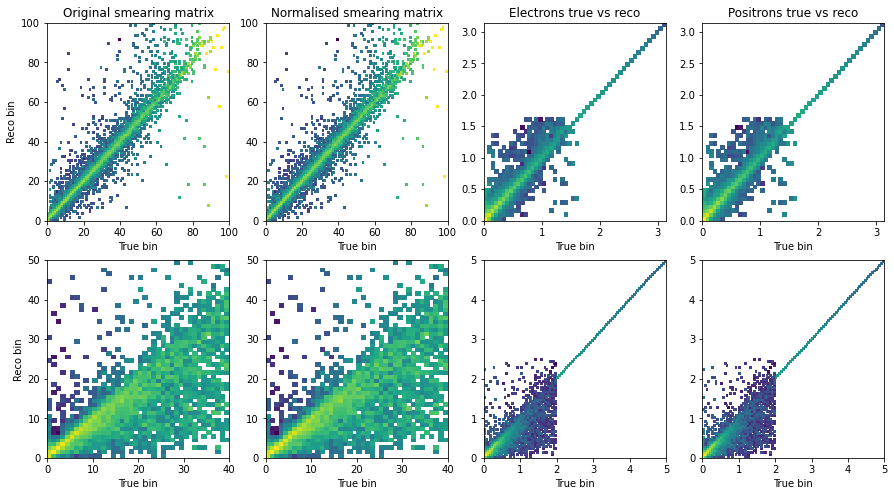

In [7]:
fig, axs = plt.subplots(2, 4, figsize=(15, 8))
axs[0][0].pcolor(my_exp_analysis.smearing_theta.T, norm=LogNorm())
axs[0][0].set_title('Original smearing matrix')

axs[0][1].pcolor((my_exp_analysis.smearing_theta.T/my_exp_analysis.smearing_theta.sum(axis=1)), norm=LogNorm())
axs[0][1].set_title('Normalised smearing matrix')

axs[0][2].hist2d(my_exp_analysis.df_base['em_beam_theta'], my_exp_analysis.df_base['em_beam_theta_reco'], 
              bins=(50, 50), range=((0, np.pi), (0, np.pi)), norm=LogNorm());
axs[0][2].set_title('Electrons true vs reco')

axs[0][3].hist2d(my_exp_analysis.df_base['ep_beam_theta'], my_exp_analysis.df_base['ep_beam_theta_reco'], 
              bins=(50, 50), range=((0, np.pi), (0, np.pi)), norm=LogNorm());
axs[0][3].set_title('Positrons true vs reco')

for ax in axs[0]:
    ax.set_xlabel('True bin')
for ax in axs[1]:
    ax.set_xlabel('True bin')
axs[0][0].set_ylabel('Reco bin')
axs[1][0].set_ylabel('Reco bin')

axs[1][0].pcolor(my_exp_analysis.smearing_p.T, norm=LogNorm())
# axs[1][0].set_title('Original smearing matrix')

axs[1][1].pcolor((my_exp_analysis.smearing_p.T/my_exp_analysis.smearing_p.sum(axis=1)), norm=LogNorm())
# axs[1][1].set_title('Normalised smearing matrix')

out_m = axs[1][2].hist2d(my_exp_analysis.df_base['em_energy'], my_exp_analysis.df_base['em_energy_reco'], 
              bins=(100, 100), range=((0, 5), (0, 5)), norm=LogNorm());
# axs[1][2].set_title('Electrons true vs reco')

out_p = axs[1][3].hist2d(my_exp_analysis.df_base['ep_energy'], my_exp_analysis.df_base['ep_energy_reco'], 
              bins=(100, 100), range=((0, 5), (0, 5)), norm=LogNorm());
# axs[1][3].set_title('Positrons true vs reco')

Text(0, 0.5, 'Reco invariant mass [GeV]')

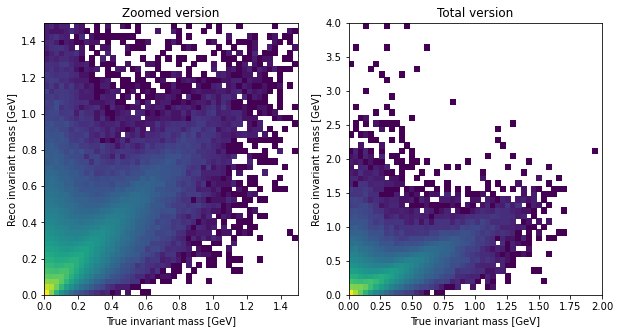

In [9]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].hist2d(my_exp_analysis.df_base['ee_mass'], my_exp_analysis.df_base['ee_mass_reco'], 
              bins=(50, 50), range=((0, 1.5), (0, 1.5)), norm=LogNorm());
axs[0].set_title('Zoomed version')
axs[0].set_xlabel('True invariant mass [GeV]')
axs[0].set_ylabel('Reco invariant mass [GeV]')
axs[1].hist2d(my_exp_analysis.df_base['ee_mass'], my_exp_analysis.df_base['ee_mass_reco'], 
              range=((0, 2), (0, 4)), bins=(50, 50), norm=LogNorm());
axs[1].set_title('Total version')
axs[1].set_xlabel('True invariant mass [GeV]')
axs[1].set_ylabel('Reco invariant mass [GeV]')